In [1]:
from transformers import pipeline
from PIL import Image, ImageDraw
from datasets import load_dataset

In [2]:
IMAGE = 'TREC-AToMiC/AToMiC-Images-v0.2'
images = load_dataset(IMAGE, split='train')

image = images[9527]['image']
obj_detector = pipeline("object-detection", model="facebook/detr-resnet-101")
results = obj_detector(image)

draw = ImageDraw.Draw(image)
for result in results:
    score = result["score"]
    label = result["label"]
    box = result["box"]
    
    box = [round(i, 2) for i in box.values()]
    x, y, x2, y2 = tuple(box)
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), label, fill="white")

Using custom data configuration TREC-AToMiC--AToMiC-Images-v0.2-275960c34975be87
Found cached dataset parquet (/store/scratch/j587yang/.cache/TREC-AToMiC___parquet/TREC-AToMiC--AToMiC-Images-v0.2-275960c34975be87/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
No pretrained weights exist for this model. Using random initialization.
/store/scratch/j587yang/project/transformers/src/transformers/models/detr/feature_extraction_detr.py:28: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
/store/scratch/j587yang/project/transformers/src/transformers/models/detr/image_processing_detr.py:776: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


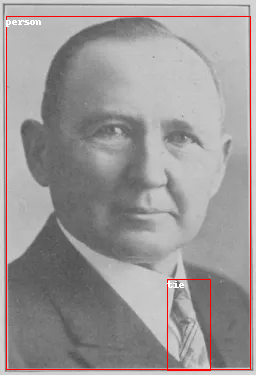

In [3]:
image